In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

Collecting data and Pre-processing

In [2]:
data = pd.read_csv('car_price.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
data.shape

(4340, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

checking the distribution of catogorical data


In [6]:
print(data.seller_type.value_counts())
print(data.transmission.value_counts())
print(data.fuel.value_counts())
print(data.owner.value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


encoding the catagorical data

In [7]:
data.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'transmission':{'Manual':0,'Automatic':1,}},inplace=True)
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [8]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


splitting data and target

---



In [9]:
x=data.drop(['name','selling_price'],axis=1)
y=data['selling_price']
x


,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,0,0
1,2007,50000,1,0,0,0
2,2012,100000,0,0,0,0
3,2017,46000,1,0,0,0
4,2014,141000,0,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,0,0,0,1
4336,2014,80000,0,0,0,1
4337,2009,83000,1,0,0,1
4338,2016,90000,0,0,0,0


In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

training and testing data

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

Model training 


1. linear regression

In [11]:
# load linear regression
lin_reg_model = LinearRegression()


In [12]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

model evaluation

In [16]:
# prediction on training data
train_data_prediction = lin_reg_model.predict(x_train)

In [18]:
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.4430787587921934


Visualize the actual price and predicted price

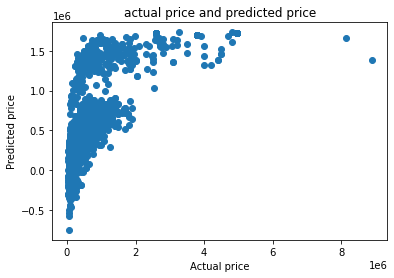

In [19]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("actual price and predicted price")
plt.show()

In [20]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.5212912933220213


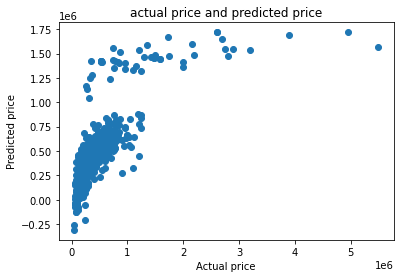

In [21]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("actual price and predicted price")
plt.show()

Lasso Regression

In [30]:
# load linear regression
lass_reg_model = Lasso()


In [31]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [32]:
# prediction on training data
train_data_prediction = lass_reg_model.predict(x_train)

In [33]:
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.4430787587404139


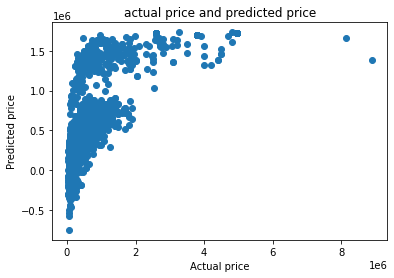

In [34]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("actual price and predicted price")
plt.show()

In [35]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.5212906062492373


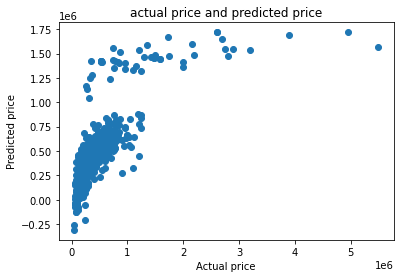

In [37]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("actual price and predicted price")
plt.show()